In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mlxtend.data as mld

In [4]:
train_data,train_label = mld.loadlocal_mnist(images_path='../../DataSets/MNIST/train-images-mnist.idx3-ubyte', # extract zip file
                        labels_path='../../DataSets/MNIST/train-labels-mnist.idx1-ubyte')

test_data,test_label = mld.loadlocal_mnist(images_path='../../DataSets/MNIST/test-images-mnist.idx3-ubyte', # extract zip file
                        labels_path='../../DataSets/MNIST/test-labels-mnist.idx1-ubyte')


In [5]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


# each row represent a single image and each column of that represent image

5


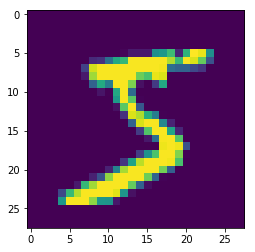

In [6]:
plt.imshow((train_data[0,:]).reshape(28,28))
print(train_label[0])

# Preprocessing

In [7]:
train_data = train_data/train_data.max()
test_data = test_data/test_data.max()

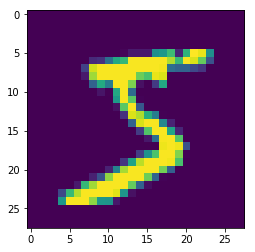

In [8]:
plt.imshow((train_data[0,:]).reshape(28,28))

In [10]:
train_data[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
train_label_ohe = np.array(pd.get_dummies(train_label))
test_label_ohe = np.array(pd.get_dummies(test_label))

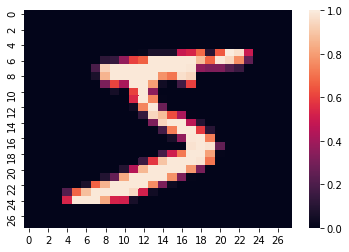

In [12]:
import seaborn as sns
sns.heatmap((train_data[0,:]).reshape(28,28))

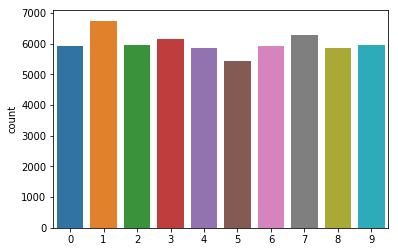

In [13]:
sns.countplot(train_label)

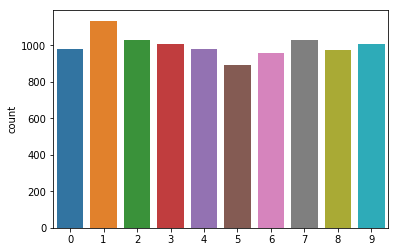

In [14]:
sns.countplot(test_label)

In [ ]:
#pd.DataFrame(train_data).describe()

softmax function: $$P\left(y^{(i)}=k | x^{(i)} ; \theta\right)=\frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}$$



$$\nabla_{\theta^{(k)}} J(\theta)=-\sum_{i=1}^{m}\left[x^{(i)}\left(1\left\{y^{(i)}=k\right\}-P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right)\right]$$

In [15]:
def softmax(theta0 , theta , features):
    labelscount = 10
    exp = np.exp(theta0 + np.dot(features , theta))  # observation * labels 1 columns for each decision boundary    
    sum_denominator = np.sum((exp) , axis=1)
    s = list(map(lambda i : exp[:,i] / sum_denominator ,  np.arange(labelscount)))
    return np.array(s).T  # observation * labels = probability of each value in their class wise

def cost_function(theta0 , theta , features , labels):
    return -(np.sum(np.matmul( np.log(softmax(theta0 , theta , features)).T  , labels )) / features.shape[0])
    

In [ ]:
def gradient_decent(features , label , alpha , batch_size = 0):
    """one hot encoded label will pass, feature is train_data"""
    label_size = 10
    initial_theta0 = np.random.randn(1 , label_size)  # 1 * no. of labels 1 theta for each class
    initial_theta = np.random.randn(features.shape[1] , label_size)  # features * labels 

    i = 1
    itera = []
    fc = []

    while i<5000:
        index = np.random.randint(0,10000,size=(batch_size,))
        del_theta0 = (np.sum(softmax(initial_theta0 , initial_theta , features[index,:])  - label[index,:] , axis=0)) / features[index,:].shape[0]
        del_theta = (np.sum(np.matmul(features[index,:].T ,(softmax(initial_theta0 , initial_theta , features[index,:])  - label[index,:]) ))) / features[index,:].shape[0]
    
        final_theta0 = initial_theta0  - alpha * del_theta0
        final_theta  = initial_theta   - alpha * del_theta

        initial_cost = cost_function(initial_theta0 , initial_theta , features[index,:] , label[index,:])
        final_cost   = cost_function(final_theta0 , final_theta , features[index,:] , label[index,:])

        print('{} Average Negative Log : {}'.format(i , final_cost))
        i+=1
        itera.append(i)
        fc.append(final_cost)
        initial_theta0 = final_theta0
        initial_theta = final_theta
        
    return initial_theta,initial_theta0,itera,fc

In [ ]:
mod_test = gradient_decent(train_feature,train_label_ohe,0.01,128)

In [19]:
theta,theta0,itera,fc = mod_test
y_pred = softmax(theta0,theta,train_feature)

(32, 784)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
c = 0
for i,j in enumerate(train_label):
    if j == y_pred[i]:
        c+=1
print(c/600)